In [ ]:
# 📦 Step 1: Mount Google Drive and Setup
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. Unzip dataset
import zipfile
import os

zip_path = "/content/drive/MyDrive/dataset_dechet.zip"
extract_path = "/content"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Confirm extraction
print(os.listdir("/content/dataset_dechet"))


['recyclable_dechet', 'non_recyclable_dechet']


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set dataset directory path
data_dir = '/content/drive/MyDrive/dataset_dechet'
categories = ['non_recyclable_dechet', 'recyclable_dechet']

In [ ]:
# 3. Load and preprocess images
import cv2
import numpy as np

IMG_SIZE = 64
base_dir = "/content/dataset_dechet"
categories = ['non_recyclable_dechet', 'recyclable_dechet']

X, y = [], []

for label, category in enumerate(categories):
    folder_path = os.path.join(base_dir, category)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0
            X.append(img)
            y.append(label)
        except Exception as e:
            pass

X = np.array(X)
y = np.array(y)

print("Dataset loaded:", X.shape, y.shape)


Dataset loaded: (850, 64, 64, 3) (850,)


In [ ]:
# 🧪 Step 3: Train-Test Split
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y, num_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)


In [ ]:
# 🧠 Step 4: Build ANN Model (Fixed with Flatten for image input)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,145,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,179,138 (12.13 MB)

 Trainable params: 3,179,138 (12.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.utils import class_weight
y_labels = np.argmax(y_cat, axis=1)
class_weights = class_weight.compute_class_weight(
class_weight='balanced',
classes=np.unique(y_labels),
y=y_labels
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

Class weights: {0: np.float64(3.102189781021898), 1: np.float64(0.5960729312762973)}


In [ ]:
# 📈 Step 5: Train the Model
model.fit(
X_train, y_train,
validation_data=(X_test, y_test),
epochs=20,
batch_size=32,
class_weight=class_weights
)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.4559 - loss: 4.7795 - val_accuracy: 0.1706 - val_loss: 2.2459
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4984 - loss: 1.1581 - val_accuracy: 0.5647 - val_loss: 0.7293
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6655 - loss: 0.6179 - val_accuracy: 0.8353 - val_loss: 0.3933
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7727 - loss: 0.5498 - val_accuracy: 0.8294 - val_loss: 0.5732
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7665 - loss: 0.7497 - val_accuracy: 0.8529 - val_loss: 0.3667
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7680 - loss: 0.5504 - val_accuracy: 0.8412 - val_loss: 0.3828
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8090 - loss: 0.4775 - val_accuracy: 0.8471 - val_loss: 0.3487
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8136 - loss: 0.4514 - val_accuracy: 0.4882 - v

In [ ]:
model.save("my_model.keras")
from google.colab import files
files.download("my_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ✅ Step 7: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.2f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7442 - loss: 0.5199

✅ Test Accuracy: 0.76


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<Figure size 600x500 with 0 Axes>

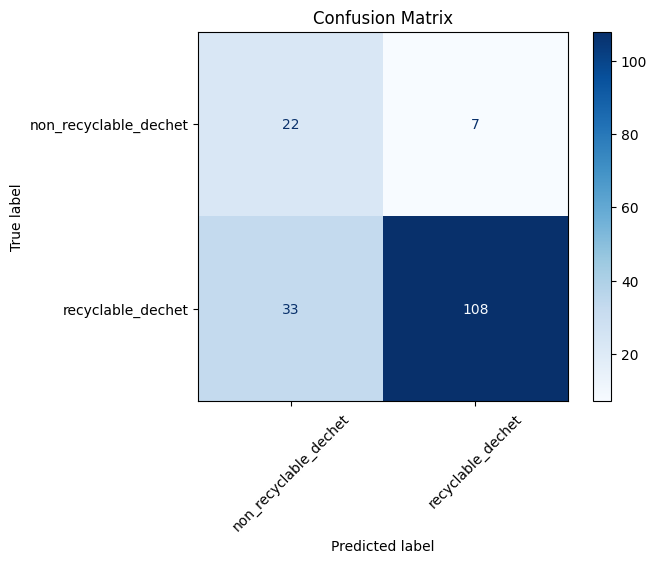

In [ ]:
# 📊 Step 8: Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
categories = ['non_recyclable_dechet', 'recyclable_dechet']
cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

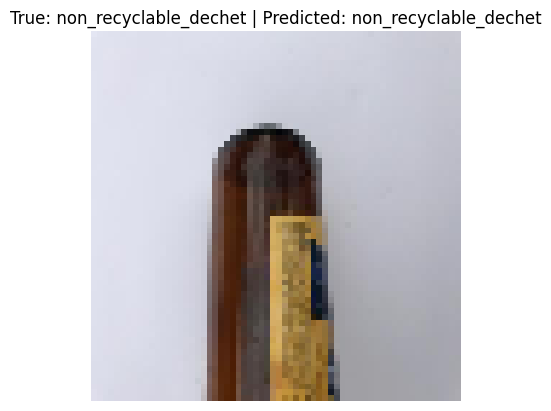

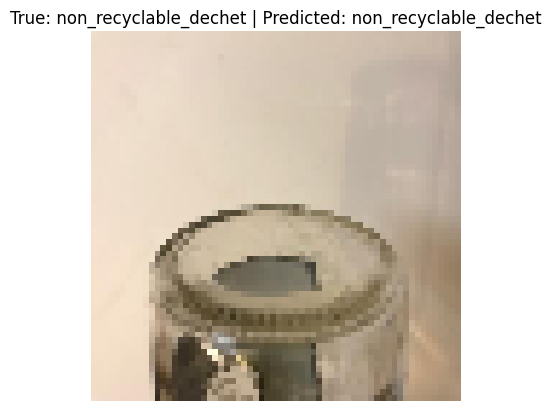

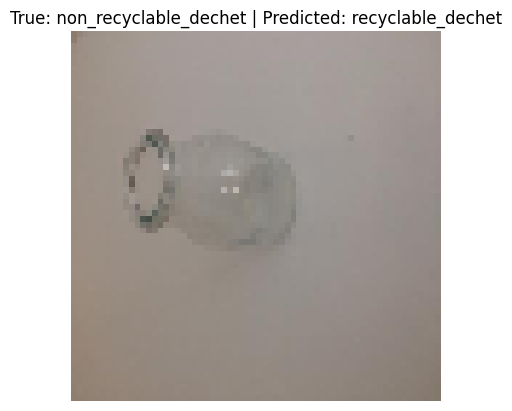

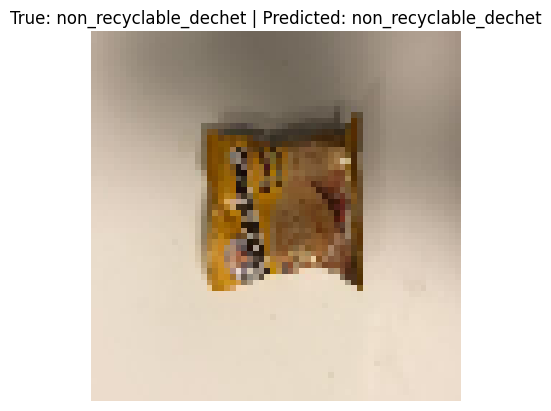

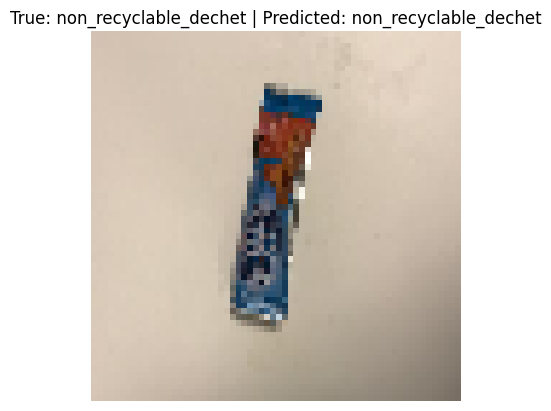

In [ ]:
import matplotlib.pyplot as plt
import random

# Select 5 random indices from the dataset
indices = random.sample(range(len(X)), 5)

for i in indices:
    image = X[i]
    sample = np.expand_dims(image, axis=0)

    # Make prediction
    prediction = model.predict(sample, verbose=0)
    predicted_label = np.argmax(prediction)

    # Get true label (from one-hot encoded vector)
    true_label = np.argmax(y[i])

    # Reshape and convert image for display
    image_reshaped = image.reshape(IMG_SIZE, IMG_SIZE, 3)
    image_uint8 = (image_reshaped * 255).astype(np.uint8)
    image_rgb = cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB)

    # Display the image with true and predicted labels
    plt.imshow(image_rgb)
    plt.title(f"True: {categories[true_label]} | Predicted: {categories[predicted_label]}")
    plt.axis('off')
    plt.show()
